<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script> 
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3.0.1/es5/tex-mml-chtml.js"></script>

# Figure 1, S8: Mass spectrometry of B. burgdorferi supernatant identifies four shed PG species.
This code prepares the plots as found in **Figure 1A**, **Figure 1E**, and **Figure S8.** All share the same source data.
- Irnov Irnov designed and completed all experiments for this figure. 
- Irnov Irnov wrote code and completed analysis for Figure 1A.
- Joshua W. McCausland wrote code and analyzed data for Figure 1E/S8.

## Figure 1A.
Code written by Irnov Irnov in the CJW lab, 2024. 

Here:
- Dataset is from 2020502, file name: XCMS.annotated.diffreport..Redo_Sup_stat_May2022.vs.Redo_Bb523_stat_May2022.tsv, renamed for this Github upload to "fig1_screen_XCMS_output.tsv." This is the output from XCMS
- Simply used updated muropeptide list and mass from 'Muropeptide_list_and_mass.csv' file
- In the XCMS file: DATASET1=BSK only, DATASET2=SUPERNATANT

Glycan shorthand:
- J = MurNac
- U = Anhydro-MurNac
- X = GlcNac-MurNac
- Z = GlcNac-AnhydroMurNac


In [6]:
from matplotlib import pyplot as plt,ticker,lines
plt.rcParams["font.family"] = "Arial" #Set global font to arialimport seaborn as sns
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

variables_to_keep = ['name', 'fold','log2fold','pvalue','updown','mzmed',
                              'rtmed','maxint', 'mean1', 'sd1', 'mean2','sd2',
                              '06_BSK_stat_1', '07_BSK_stat_2', '08_BSK_stat_3',
                              '12_Bb523_stat_1', '13_Bb523_stat_2', '14_Bb523_stat_3']

xcms_table = pd.read_table(f'included_small_datasets/fig1_screen_XCMS_output.tsv')
xcms_table = xcms_table[variables_to_keep]
xcms_table

,name,fold,log2fold,pvalue,updown,mzmed,rtmed,maxint,mean1,sd1,mean2,sd2,06_BSK_stat_1,07_BSK_stat_2,08_BSK_stat_3,12_Bb523_stat_1,13_Bb523_stat_2,14_Bb523_stat_3
0,M243T8_2,117.864496,-6.880985,4.142908e-12,DOWN,243.049985,7.519350,218032.796875,8.752810e+05,968.518403,7426.163593,892.083295,8.759962e+05,8.741788e+05,8.756681e+05,8372.841868,7304.481656,6601.167254
1,M558T12_3,154.322504,-7.269805,1.156402e-10,DOWN,558.217095,11.607133,35372.113281,2.405064e+05,286.120146,1558.466247,403.665609,2.408184e+05,2.402563e+05,2.404446e+05,1605.556838,1936.521227,1133.320676
2,M408T8_5,53.569098,-5.743329,5.821774e-10,DOWN,408.197114,8.367775,671228.937500,2.705249e+06,5591.433697,50500.181157,3642.901009,2.703920e+06,2.711385e+06,2.700442e+06,51029.977927,46621.390924,53849.174622
3,M136T4_2,38.467347,-5.265562,6.076859e-10,DOWN,136.107879,3.964467,172941.265625,1.010897e+06,3311.698169,26279.366245,2620.389336,1.008777e+06,1.014714e+06,1.009202e+06,23989.326498,25711.718977,29137.053262
4,M810T7,4.364740,-2.125896,6.796048e-10,DOWN,810.365082,7.053817,6603.052734,4.449829e+04,70.284400,10194.945735,97.830148,4.444549e+04,4.447132e+04,4.457807e+04,10286.999075,10205.623339,10092.214790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52869,M101T10_4,1.000079,0.000114,9.998039e-01,UP,101.107002,10.146133,17272.074219,1.213552e+05,37541.053720,121364.738985,50792.704282,1.414260e+05,7.804510e+04,1.445944e+05,89155.343262,95021.646224,179917.227468
52870,M449T18_6,1.000023,0.000033,9.998177e-01,UP,449.308790,17.656125,8773.641602,1.674977e+04,1214.328015,16750.152269,2343.570259,1.598016e+04,1.814965e+04,1.611952e+04,14960.551717,19402.882850,15887.022238
52871,M704T5,1.000026,0.000037,9.998650e-01,UP,704.314014,4.601858,2272.682861,6.171430e+03,179.876272,6171.589783,1447.530389,5.965929e+03,6.248054e+03,6.300306e+03,4794.762067,6039.270247,7680.737036
52872,M1060T16_4,1.000023,0.000033,9.998985e-01,UP,1059.906835,15.554542,1704.005493,4.865257e+03,474.423137,4865.367412,1282.604276,5.411280e+03,4.630609e+03,4.553882e+03,3852.114006,4436.546691,6307.441537


Here, Irnov selects relevant mass features by removing mass features present in SUP only samples

Some criteria:
- Intensity (peak area) has to be at least 3x higher than BSK only (low fold change to pick up low abundance peaks)
- Limit maxint to be at least 20,000
- $pvalue < 0.05$
- $rt < 20$ min (after 20 min, it is the washing step)

In this case: XCMS already calculated the mean per triplicates

Mean1 = mean from BSK only samples
Mean2 = mean from Bb stationary phase sup

In [3]:
# Compare peaks from BSK (dataset1) vs SUP (Dataset2) - keep only when 3x higher (Boolean)
comp_1 = (xcms_table.fold>=3) & (xcms_table.updown=='UP')

# Compare peaks from BSK (dataset1) vs SUP (Dataset2) - keep only the ones with max signal above 8000 in all dataset
comp_2 = xcms_table.maxint >= 20000

# Compare peaks from BSK (dataset1) vs SUP (Dataset2) - keep only the ones with pvalue < 0.05
comp_3 = xcms_table.pvalue < 0.05

# Compare peaks from BSK (dataset1) vs SUP (Dataset2) - rt < 20 min
comp_4 = xcms_table.rtmed < 20

# Use combined Boolean array from above to select rows
new_peaks = xcms_table[comp_1&comp_2&comp_3&comp_4]

# This generates ~266 peaks from this analysis
new_peaks

,name,fold,log2fold,pvalue,updown,mzmed,rtmed,maxint,mean1,sd1,mean2,sd2,06_BSK_stat_1,07_BSK_stat_2,08_BSK_stat_3,12_Bb523_stat_1,13_Bb523_stat_2,14_Bb523_stat_3
24,M554T2_2,7.634118,2.932462,2.975627e-08,UP,554.249958,2.123517,30548.777344,17436.875454,926.852648,1.331152e+05,6.629292e+02,16527.394544,17403.057636,18380.174183,1.325925e+05,1.328921e+05,1.338609e+05
27,M296T3_1,6.793076,2.764065,3.577979e-08,UP,296.108695,3.050075,142598.015625,232909.091967,11310.422870,1.582169e+06,8.064329e+03,244963.274127,231234.952166,222529.049608,1.576399e+06,1.591384e+06,1.578725e+06
28,M110T7_4,7.694044,2.943742,3.793305e-08,UP,110.030929,6.835733,647305.875000,324413.207902,10400.913312,2.496049e+06,1.578891e+04,316280.691681,320825.994077,336132.937947,2.495841e+06,2.480366e+06,2.511941e+06
29,M326T8_6,3.351889,1.744975,4.176760e-08,UP,326.171681,7.573183,39456.320312,46280.448727,1232.919447,1.551269e+05,1.118771e+03,44899.794757,47271.502039,46670.049384,1.554021e+05,1.538963e+05,1.560825e+05
38,M371T12_2,56.006011,5.807510,7.063567e-08,UP,371.156859,11.618200,813603.937500,63010.125503,5069.486947,3.528946e+06,1.140979e+04,59289.530300,60956.655557,68784.190651,3.522288e+06,3.542120e+06,3.522429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18308,M246T3_2,4.798056,2.262450,3.240497e-02,UP,246.129264,3.401400,183109.031250,900474.270100,5028.741652,4.320526e+06,1.093138e+06,898127.358879,897048.024808,906247.426613,4.023828e+06,3.406366e+06,5.531386e+06
19236,M638T10_1,3.900763,1.963756,3.842415e-02,UP,637.789825,9.863292,34582.765625,42791.502377,1358.226636,1.669195e+05,4.347405e+04,42554.840651,44252.507071,41567.159410,2.171179e+05,1.415328e+05,1.421078e+05
19250,M107T3_3,15.424636,3.947165,3.852688e-02,UP,107.055511,2.920550,29418.929688,3919.478687,1204.695275,6.045653e+04,1.991549e+04,5045.484719,2649.104822,4063.846520,3.761129e+04,6.959928e+04,7.415903e+04
19307,M499T18_1,3.956591,1.984258,3.898417e-02,UP,499.241511,17.791733,23678.505859,14173.280829,953.744314,5.607788e+04,1.486409e+04,15067.444120,14282.959657,13169.438711,5.132552e+04,7.273700e+04,4.417112e+04


Having identified the relevant peaks (higher intensity in Sup vs BSK only), we want to further narrow down the list based on hits to potential PG fragments. This can be done by matching the predicted m/z
to a library of muropeptides, Supplementary Dataset 1 in the paper. Here, it is the Python-readable file "muropeptide_reference_df.pkl."

In [4]:
# Read the master list
# It contains the muropeptide species and their corresponding mass, mz, etc
mass_list = pd.read_pickle('included_small_datasets/muropeptide_reference_df.pkl')

# Change the column name to make it simple
mass_list = mass_list.rename(columns={'mz_plus_1':'M+1', 'mz_plus_2':'M+2', 'mz_plus_3':'M+3', 'mz_plus_Na':'M+Na'})

# Change the shape of the master table to make it easier for iterating through the data
mass_list_long = pd.melt(mass_list, id_vars=['Species','Mass'], value_vars=['M+1','M+2'], 
        var_name='Charge', value_name='mz')

# Since I am only looking at Bb PG, remove anything with Glutamine (Q), mDAP (B) and Lysine (K)
mass_list_long = mass_list_long[~mass_list_long.Species.str.contains('Q|B|K')]

# Remove duplicated data
mass_list_long = mass_list_long.drop_duplicates()

# Check mass list
mass_list_long[mass_list_long.Species=='Z']

,Species,Mass,Charge,mz
28,Z,478.179874,M+1,479.187150
784,Z,478.179874,M+2,240.097213


The strategy:
- Loop through all $m/z$ values detected in "new_peaks." 
- For each, check whehter the $m/z$ values are present in the mass list (check +1/+2 values only)
- If so, add annotation to the "new_peaks" dataframe.

In [7]:
def is_muropeptide(mz_in, master_list, ppm=10):
    COARSE = 1
    mzhi = mz_in+COARSE
    mzlo = mz_in-COARSE
    
    #as a first pass, just find everything in the master list with +/- 1 of the mz_in value
    matched = master_list[(master_list.mz >= mzlo) & (master_list.mz <= mzhi)].copy()
    
    annot_str = ''   #hold the annotation in string format
    dppm_str=''      #hold delta ppm in string format
    
    if len(matched.index)>0:
        #make sure that each hit is within the designated ppm value
        for j in range(0,len(matched)):
            
            #column 3 is the mz value in matched dataframe(=4th from the left)
            val = matched.iloc[j,3]
            
            #obtain +/- ppm 
            ppm_high = val+(ppm*val/1000000)
            ppm_low = val-(ppm*val/1000000)
            
            #If input mz is within certain ppm of muropeptide in the master list, add annotation
            if (mz_in >= ppm_low) & (mz_in <= ppm_high):
                
                #For annotation: add comma if there are previous annotation
                if(len(annot_str)>0): 
                    annot_str = annot_str + ','
                    dppm_str = dppm_str + ','
                    
                #For annotation: combine species and charge info by '_' (underscore)
                annot_str = annot_str + matched.iloc[j,0]+'_'+matched.iloc[j,2]
                
                # ∆ppm = (m/z detected - m/z predicted) divided by m/z predicted, multiply by 1,000,000
                dppm_str = dppm_str + str(round(abs((mz_in-val)/val*1000000),1))
    
    #Return a list woth two strings
    retList = [annot_str, dppm_str]
    return retList
            
#Create a new column to hold the annotation
new_peaks['annot']=''
new_peaks['dppm']=''

#Loop through the dataframe containing selected peaks, then add annotation when appropriate
for i in range(0,len(new_peaks)):
    
    #Check if the peak mz correspond to any muropeptides
    #column 5 is the mzmed in this dataset
    res = is_muropeptide(new_peaks.iloc[i,5], mass_list_long, ppm=10)           
    
    #If yes, add annotation to the 'new_peaks' dataframe
    if res[0] != '':
        new_peaks.iloc[i,new_peaks.columns.get_loc('annot')] = res[0]
        new_peaks.iloc[i,new_peaks.columns.get_loc('dppm')] = res[1]

muro_peaks = new_peaks[new_peaks.annot != ''].copy()
muro_peaks.sort_values('fold', ascending =False)

,name,fold,log2fold,pvalue,updown,mzmed,rtmed,maxint,mean1,sd1,mean2,sd2,06_BSK_stat_1,07_BSK_stat_2,08_BSK_stat_3,12_Bb523_stat_1,13_Bb523_stat_2,14_Bb523_stat_3,annot,dppm
190,M992T9_1,85.171946,6.412306,1.011941e-06,UP,992.441003,9.396400,21540.716797,1096.491460,227.898098,93390.311245,594.736792,1358.996076,981.240349,949.237956,93345.502432,92819.246209,94006.185094,"ZAEOAAG_M+1,XAEOAAG-ZAEOAAG_M+2,UAEOAAG-HXAEOA...","0.9,0.9,0.9,0.9"
189,M532T2_7,57.659846,5.849495,1.005718e-06,UP,532.268217,2.100667,59860.679688,3226.440927,1335.607039,186036.087381,2435.953554,2345.768471,2570.347411,4763.206898,184557.564411,188847.629515,184703.068217,AEOAAG_M+1,8.1
184,M992T9_2,50.082795,5.646243,9.891568e-07,UP,992.440980,9.019617,123709.343750,9118.782193,2152.955796,456694.101567,4490.570827,8023.154613,7734.002179,11599.189788,456577.304677,461241.931514,452263.068509,"ZAEOAAG_M+1,XAEOAAG-ZAEOAAG_M+2,UAEOAAG-HXAEOA...","0.9,0.9,0.9,0.9"
2612,M475T2_7,12.384605,3.630476,1.845465e-04,UP,475.246453,1.642767,56393.007812,19919.324131,945.402318,246692.953189,6199.339292,20947.275297,19723.582490,19087.114605,240166.423164,247409.629888,252502.806514,AEOAA_M+1,9.8
169,M992T9_3,11.765305,3.556467,8.483172e-07,UP,992.439808,8.541367,24120.322266,8172.397966,1646.753968,96150.757086,2031.068215,6522.267323,9815.754359,8179.172215,96366.008104,94020.636005,98065.627150,"ZAEOAAG_M+1,XAEOAAG-ZAEOAAG_M+2,UAEOAAG-HXAEOA...","2.1,2.1,2.1,2.1"
1232,M789T18_13,9.033498,3.175285,3.879220e-05,UP,789.357926,17.746917,25899.548828,11262.911640,2708.333578,101743.489869,4459.398784,9377.153309,10045.233607,14366.348004,98574.176274,99813.487933,106842.805400,"UAEOAAG_M+1,JAEOAAG-UAEOAAG_M+2","5.8,5.8"
5816,M174T9_3,8.062031,3.011143,1.152366e-03,UP,174.075697,9.048833,57227.007812,27323.656354,17071.876216,220284.163476,5506.678419,37841.354897,36503.729153,7625.885012,214171.969186,221822.262621,224858.258622,UA_M+2,2.2
4141,M850T8_2,6.559797,2.713651,5.075223e-04,UP,850.366406,8.317550,29450.218750,17333.206777,509.392194,113702.320717,4100.149796,16750.546455,17554.818798,17694.255078,108969.317892,116170.022616,115967.621643,"ZAEOG_M+1,XAEOG-ZAEOG_M+2,UAEOG-HXAEOG_M+2,JAE...","1.4,1.4,1.4,1.4"
13894,M479T7_1,4.025050,2.009007,1.310265e-02,UP,479.182985,7.403917,38601.468750,43430.937305,26761.792083,174811.709670,2186.923068,58459.286331,59300.626024,12532.899561,172662.333253,174738.456998,177034.338760,Z_M+1,8.7


Here, we would only plot potential muropeptides peaks that have been manually verified through manual peak verification, quality evaluation, isotopic distribution check, etc. This is similar to above but only highlighting PG-like peaks that we are very confident about.

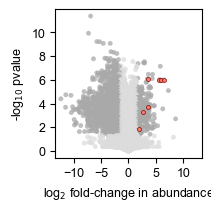

In [8]:
fig,_ax = plt.subplots(figsize=[2,2],layout = 'constrained')
bgdata = xcms_table[(xcms_table.rtmed<20) & (xcms_table.maxint>=20000)]
bgdata['abslogpval']=-1*np.log10(bgdata.pvalue)
bgdata['sig'] = (bgdata.fold >= 3) & (bgdata.pvalue < 0.05)
bgdata['color'] = bgdata.sig.apply(lambda x: 'darkgrey' if x == True else 'gainsboro')
sns.scatterplot(data=bgdata,x='log2fold',y='abslogpval',color=bgdata.color,alpha=0.75,edgecolor=bgdata.color,s=10)

# Overlay the ALL muropeptide related peaks detected avove on the same plot and give different color
muro_peaks = new_peaks[new_peaks.annot != ''].copy()
muro_peaks['abslogpval']=-1*np.log10(muro_peaks.pvalue)
muro_peaks = muro_peaks.drop(index=1232,axis=0) #drop the value for UAEOAAG. The EIC data rule that out as a candidate.
muro_peaks = muro_peaks.drop(index=5816,axis=0) #drop the value for UA. The MS/MS data rule that out as a candidate.

sns.scatterplot(data=muro_peaks,x='log2fold',y='abslogpval',color='salmon',edgecolor='DarkRed',s=8,linewidth=0.5)
_xlim = _ax.get_xlim()
max_xlim = np.max(np.abs(_xlim))
_ax.set_xlim([-max_xlim,max_xlim])      
_ax.set_xticks([-10,-5,0,5,10])
_ax.set_yticks([0,2,4,6,8,10])
_ax.set_xlabel('log$_2$ fold-change in abundance',fontsize=9)
_ax.set_ylabel('-log$_{10}$ pvalue',fontsize=9)
_ax.tick_params(axis='both',labelsize=9)

## Figure 1E. EIC profiles of muropeptide hits. 
Code by Joshua W. McCausland, CJW lab. 

Here we follow up on Irnov's detected hits and plot the extracted ion count profiles for each. I use the pymzml function to open the mzML files, convert them to Pandas dataframes, then save them as python-friendly pickle files. We open the pickle files, extract the mass value we are interested in, and plot their intensity vs. retention time.

In [1]:
# load relevant packages. 
import os,glob
from matplotlib import pyplot as plt,ticker,lines
plt.rcParams["font.family"] = "Arial" #Set global font to arialimport seaborn as sns
import seaborn as sns
import numpy as np
import pandas as pd
from pymzml.run import Reader
import warnings
warnings.filterwarnings("ignore")

# This is my function to make EICs. I scan mz dataframes for a mass +/- an error (ppm). 
# I return the sum of all peaks which correspond to the matching mzs in our mass window. 
def refine_mass(df,ppm = 20,mass_to_search = 0):
    low_mass = mass_to_search - (ppm*mass_to_search/1e6)
    high_mass = mass_to_search + (ppm*mass_to_search/1e6)
    result = df.apply(lambda row: np.sum(row.peaks[np.where(np.logical_and(row.mz >= low_mass, row.mz <= high_mass))]) if row.peaks[np.where(np.logical_and(row.mz > low_mass, row.mz < high_mass))].shape[0] > 0 else 0,axis=1)
    return result

This is the code to convert mzML files to Pandas dataframes. 
- Add the experiment directory where mzML files are located. 
- It will iterate through each mzML file, convert them to a dataframe, then save as a pickle in the local directory.
- It will save files in a folder named "pickle_data." **Make this folder before you run this code.**

In [ ]:
# Add the directory with the mzML files of choice. This will iterate through the mzML files and convert them to 
# Pandas dataframes. It will save all outputs in a "pickle_data" folder. 
experiment_directory = '/Volumes/Data_06/Previous_member_B/Irnov Irnov/Scientist-Stanford/Data/LCMS/Data/QTOF/PolarC18/2022/20220502-PolarC18-Repeat523'

# I pull all mzML files with "stat" in the filename. they are the experiment files I wish to analyze.
filelist = glob.glob(f'{experiment_directory}/*stat*.mzML')
for file in filelist:
    filename = os.path.basename(file).removesuffix('.mzML')
    run = Reader(file)
    run_df = pd.DataFrame({'scanID': [key for key in run.info['offset_dict'].keys() if str(key).isnumeric()]})
    run_df['time'] = run_df.scanID.apply(lambda row: run[row].scan_time_in_minutes())
    run_df['mz'] = run_df.scanID.apply(lambda row: run[row].mz)
    run_df['peaks'] = run_df.scanID.apply(lambda row: run[row].centroidedPeaks)
    run_df['peaks'] = run_df.peaks.apply(lambda row: np.column_stack(row)[1] if row.shape[0] > 0 else row)
    run_df.to_pickle(f'pickle_data/{filename}.pkl')

This section takes all the mass spec pickle files and concatenates them into a single dataframe. Here we:
- Add identifying columns for the sample condition (BSK-II for media only, or Bb for supernatant)
- Biological replicate identifier (1,2, or 3)
- I previously converted Irnov's muropeptide reference library to a pandas dataframe and saved it as a pickle for each import. 
- Load the reference dataframe, extract the species of interest ('species_to_plot') from that. 
- I calculate EICs for the species of interest using my function 'refine_mass.'

In [2]:
# specify the species we wish to explore.
species_for_EICs = ['AEOAAG','AEOAA','ZAEOAAG','ZAEOG','Z','UAEOAAG','UA','X','XAEOG','XAEOAAG']

# specify the adducts for each species. 
pg_detected_mass = {
    'AEOAAG': 'mz_plus_1',
    'AEOAA': 'mz_plus_1',
    'ZAEOAAG': 'mz_plus_1',
    'ZAEOG': 'mz_plus_1',
    'Z': 'mz_plus_1',
    'UA': 'mz_plus_2',
    'UAEOAAG': 'mz_plus_1',
    'X': 'mz_plus_1',
    'XAEOG': 'mz_plus_1',
    'XAEOAAG': 'mz_plus_1'
}

experiment_directory = '//mothership2.stanford.edu/Common/Science communication/Manuscripts/Papers/2024/Bb PG shedding/Draft_figures/SourceData/Fig1/pickle_data'
filelist = glob.glob(f'{experiment_directory}/*.pkl')

# this is the reference dataframe that Irnov created.
reference_df = pd.read_pickle(f'included_small_datasets/muropeptide_reference_df.pkl').drop_duplicates()
reference_df = reference_df[reference_df.Species.isin(species_for_EICs)]

# Iteratively load each mz file and concatenate into the main dataframe, rundf
rundf = pd.DataFrame()
for file in filelist:
    filename = os.path.basename(file)
    condition = filename.split('_')[1]
    replicate = int(filename.split('_')[-1][0])
    temp_df = pd.read_pickle(file)
    temp_df['condition'] = np.repeat(condition,temp_df.shape[0])
    temp_df['replicate'] = np.repeat(replicate,temp_df.shape[0])
    rundf = pd.concat([rundf,temp_df])

# make EICs for select species.
for _,row in reference_df.iterrows():
    adduct = pg_detected_mass[row.Species]
    rundf[row.Species] = refine_mass(rundf,mass_to_search=row[adduct],ppm=20)

rundf

,scanID,time,mz,peaks,condition,replicate,AEOAA,UA,X,Z,AEOAAG,XAEOG,ZAEOG,UAEOAAG,XAEOAAG,ZAEOAAG
0,69302,1.154900,"[70.06517917346761, 71.06019574115744, 72.0803...","[1958.100341796875, 231.0828399658203, 4182.68...",BSK,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69981,1.166217,"[70.06443947533799, 71.0599948886356, 72.08007...","[887.5724487304688, 279.1404113769531, 4787.25...",BSK,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70661,1.177550,"[70.06526756018152, 71.04835537202695, 71.0604...","[1761.4647216796875, 331.0296630859375, 409.06...",BSK,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71341,1.188883,"[70.06482845593257, 71.0605358562517, 72.04368...","[1357.405029296875, 464.012451171875, 203.9056...",BSK,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72020,1.200200,"[70.06520455557074, 71.0490510775654, 71.06898...","[157464.03125, 6124.89501953125, 11812.3974609...",BSK,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,1198830,19.980367,"[70.06516624034144, 71.06351400112902, 71.0853...","[8378.3427734375, 625.7009887695312, 333.37655...",Bb523,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1663,1199510,19.991700,"[70.06486351994052, 71.06812164859322, 71.0854...","[7507.76171875, 1113.3572998046875, 564.414428...",Bb523,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1664,1200189,20.003017,"[70.06500791584908, 70.0898999593242, 71.06099...","[5736.03662109375, 257.0347595214844, 1076.444...",Bb523,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665,1200869,20.014350,"[70.06539904682177, 71.06486848461027, 71.0853...","[7097.00634765625, 428.2098693847656, 559.0372...",Bb523,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Make the plots as shown in **Figure 1E**. 

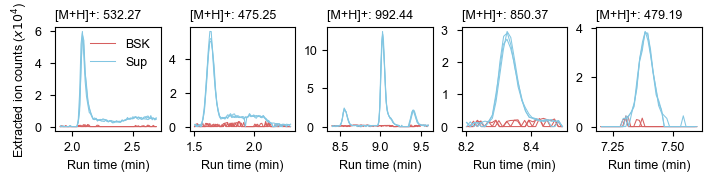

In [19]:
species_to_plot = ['AEOAAG','AEOAA','ZAEOAAG','ZAEOG','Z']

# Here I define the time windows for the x axis as a dictionary. 
# This can be called iteratively per species.
species_dictionary = {
    'ZAEOAAG': [8.4,9.6],
    'ZAEOG': [8.2,8.5],
    'Z': [7.2,7.6],
    'AEOAAG': [1.9,2.7],
    'AEOAA': [1.5,2.3],
}

# Defining the format for the y-ticks.
def y_fmt(x, y):
    return f'{(x/1e4):<2.0f}'.format(x).split('e')[0]

# color pallete for EIC lines.
_palette = [sns.color_palette('muted')[3]] + [sns.color_palette('muted')[-1]]

fig,axs = plt.subplots(ncols = 5,figsize = (7,1.7),layout = 'constrained')

# loop through each axis and PG species to make the EIC plot.
for _ax,species in zip(axs,species_to_plot):      
    # extract the time window for the current species
    time_window = species_dictionary[species]
    # plot the EIC
    sns.lineplot(data = rundf[rundf.time.between(time_window[0],time_window[1])],x='time',y=species,hue='condition',ax=_ax,style='replicate',dashes=False,linewidth=0.75,legend=False,palette=_palette)
    adduct = pg_detected_mass[species]
    # grab the mz value for the current species
    mz_temp = reference_df[reference_df.Species == species][adduct].values[0]
    # annotate mz
    _ax.set_title(f'[M+H]+: {mz_temp:.2f}',fontsize=9,loc='left')
    _ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    _ax.set_ylabel('')
    _ax.tick_params(axis='both',labelsize=9)
    _ax.set_xlabel('Run time (min)',fontsize=9)
    _ax.spines[['top','bottom','left','right']].linewidth=1

axs[0].set_ylabel('Extracted ion counts ($x10^4$)',fontsize=9)

# custom legend applied only to axis 1.
labels = [] 
conditions = ['BSK','Sup']
for idx,item in zip(conditions,_palette):
    labels.append((lines.Line2D([0],[0],color=item,linewidth=0.75),idx))
axs[0].legend(*zip(*labels),loc = 'upper right',frameon = False,fontsize=9)

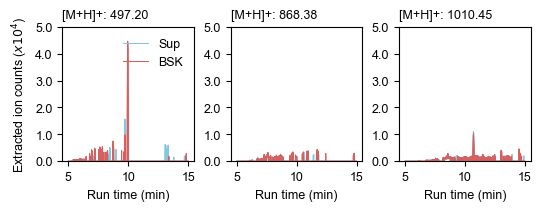

In [20]:
# Here I define the time windows for the x axis as a dictionary. 
# This can be called iteratively per species.
species_to_plot = ['X','XAEOG','XAEOAAG']
species_dictionary = {
    'XAEOAAG': [5,15],
    'XAEOG': [5,15],
    'X': [5,15],
}

# Defining the format for the y-ticks.
def y_fmt(x, y):
    return f'{(x/1e4):<2.1f}'.format(x).split('e')[0]

# color pallete for EIC lines.
_palette = [sns.color_palette('muted')[3]] + [sns.color_palette('muted')[-1]]

fig,axs = plt.subplots(ncols =3,figsize = (5.3,2),layout = 'constrained')

# loop through each axis and PG species to make the EIC plot.
for _ax,species in zip(axs,species_to_plot):      
    # extract the time window for the current species
    time_window = species_dictionary[species]
    # plot the EIC
    sns.lineplot(data = rundf[rundf.time.between(time_window[0],time_window[1])],x='time',y=species,style='replicate',hue='condition',hue_order=['Bb523','BSK'],ax=_ax,dashes=False,linewidth=0.75,legend=False,palette=_palette[::-1])
    adduct = pg_detected_mass[species]
    # grab the mz value for the current species
    mz_temp = reference_df[reference_df.Species == species][adduct].values[0]
    # annotate mz
    _ax.set_title(f'[M+H]+: {mz_temp:.2f}',fontsize=9,loc='left')
    _ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    _ax.set_ylabel('')
    _ax.tick_params(axis='both',labelsize=9)
    _ax.set_xlabel('Run time (min)',fontsize=9)
    _ax.spines[['top','bottom','left','right']].linewidth=1
    _ax.set_ylim([0,5e4])

axs[0].set_ylabel('Extracted ion counts ($x10^4$)',fontsize=9)

# custom legend applied only to axis 1.
labels = [] 
conditions = ['Sup','BSK']
for idx,item in zip(conditions,_palette[::-1]):
    labels.append((lines.Line2D([0],[0],color=item,linewidth=0.75),idx))
axs[0].legend(*zip(*labels),loc = 'upper right',frameon = False,fontsize=9)

We see a couple of additional enriched hits (UA, UAEOAAG). Plotting EIC profiles and isotope distributions shows that these are not valid.
- The EIC for UAEOAAG (mz+1 789.358) has enriched BSK-II signal.
- The detected adduct for UA is mz+2 (174.07). I expect the isoptope abundance pattern to go 174, 174.5, 175, etc. Here, we see the normal increased steps of 1. This detected hit is not a \[M+H\]2+ PG molecule.

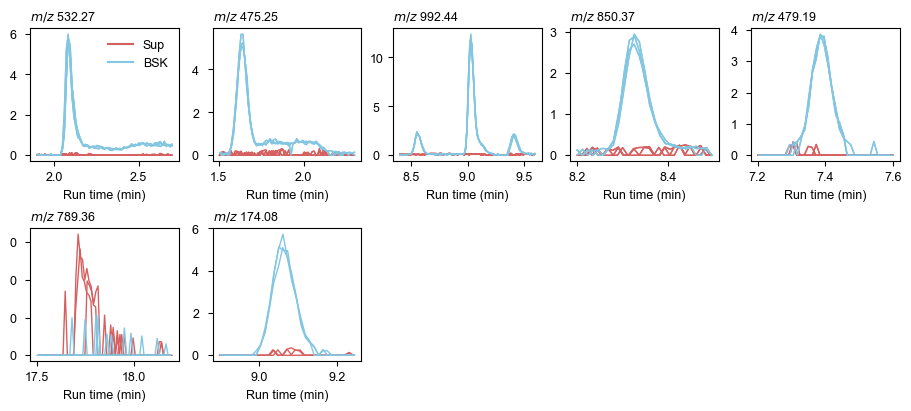

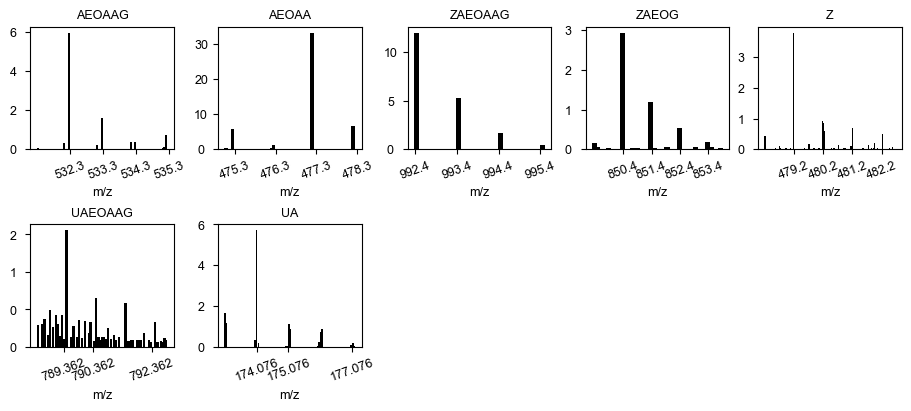

In [4]:
species_to_plot = ['AEOAAG','AEOAA','ZAEOAAG','ZAEOG','Z','UAEOAAG','UA']

# Here I define the time windows for the x axis as a dictionary. 
# This can be called iteratively per species.
species_dictionary = {
    'ZAEOAAG': [8.4,9.6],
    'ZAEOG': [8.2,8.5],
    'Z': [7.2,7.6],
    'AEOAAG': [1.9,2.7],
    'AEOAA': [1.5,2.3],
    'UAEOAAG': [17.5,18.2],
    'UA': [8.9,9.25]
}
_replicate = 3

# Defining the format for the y-ticks.
def y_fmt(x, y):
    return f'{(x/1e4):<2.0f}'.format(x).split('e')[0]

# color pallete for EIC lines.
_palette = [sns.color_palette('muted')[3]] + [sns.color_palette('muted')[-1]]

fig,axs = plt.subplots(ncols = 5,nrows=2,figsize = (9,4),layout = 'constrained')

fig2,axs2 = plt.subplots(ncols = 5,nrows=2,figsize = (9,4),layout = 'constrained')


# loop through each axis and PG species to make the EIC plot.
for _ax,species in zip(axs[0],species_to_plot):      
    # extract the time window for the current species
    time_window = species_dictionary[species]
    # plot the EIC
    sns.lineplot(data = rundf[rundf.time.between(time_window[0],time_window[1])],x='time',y=species,hue='condition',ax=_ax,style='replicate',dashes=False,linewidth=1,legend=False,palette=_palette)
    adduct = pg_detected_mass[species]
    # grab the mz value for the current species
    mz_temp = reference_df[reference_df.Species == species][adduct].values[0]
    # annotate mz
    _ax.set_title(f'$m/z$ {mz_temp:.2f}',fontsize=9,loc='left')

for _ax,species in zip(axs[1],species_to_plot[5:]):      
    # extract the time window for the current species
    time_window = species_dictionary[species]
    # plot the EIC
    sns.lineplot(data = rundf[rundf.time.between(time_window[0],time_window[1])],x='time',y=species,hue='condition',ax=_ax,style='replicate',dashes=False,linewidth=1,legend=False,palette=_palette)
    adduct = pg_detected_mass[species]
    # grab the mz value for the current species
    mz_temp = reference_df[reference_df.Species == species][adduct].values[0]
    # annotate mz
    _ax.set_title(f'$m/z$ {mz_temp:.2f}',fontsize=9,loc='left')

# loop through each axis and PG species to make the EIC plot.
for _ax,species in zip(axs[0],species_to_plot):      
    # extract the time window for the current species
    time_window = species_dictionary[species]
    # plot the EIC
    sns.lineplot(data = rundf[rundf.time.between(time_window[0],time_window[1])],x='time',y=species,hue='condition',ax=_ax,style='replicate',dashes=False,linewidth=1,legend=False,palette=_palette)
    adduct = pg_detected_mass[species]
    # grab the mz value for the current species
    mz_temp = reference_df[reference_df.Species == species][adduct].values[0]
    # annotate mz
    _ax.set_title(f'$m/z$ {mz_temp:.2f}',fontsize=9,loc='left')

# loop through each axis and PG species to make the EIC plot.
for _ax,species in zip(axs2[0],species_to_plot):      
    # extract the time window for the current species
    time_window = species_dictionary[species]
    adduct = pg_detected_mass[species]
    
    mz_value = reference_df[reference_df.Species == species][adduct].values[0]
    temp_df = rundf[(rundf.replicate == _replicate) & (rundf.condition == 'Bb523')]
    temp_df = temp_df[temp_df.time.between(time_window[0],time_window[1])]
    max_point = temp_df[temp_df[species] == temp_df[species].max()][['mz','peaks']]
    max_point = max_point.explode(column=['mz','peaks'])
    max_point = max_point[(max_point.mz.between(mz_value-1,mz_value + 3.5))]
    sns.barplot(data=max_point,x='mz',y='peaks',ax=_ax,color='black',native_scale=True,width=2)
    #_ax.set_xticklabels('')
    _ax.set_xticks(np.round([mz_value, mz_value + 1, mz_value + 2, mz_value +3],1))
    _ax.set_title(species,fontsize=9)

# loop through each axis and PG species to make the isotope abundance plot.
for _ax,species in zip(axs2[1],species_to_plot[5:]):      
    # extract the time window for the current species
    time_window = species_dictionary[species]
    adduct = pg_detected_mass[species]
    
    mz_value = reference_df[reference_df.Species == species][adduct].values[0]
    temp_df = rundf[(rundf.replicate == _replicate) & (rundf.condition == 'Bb523')]
    temp_df = temp_df[temp_df.time.between(time_window[0],time_window[1])]
    max_point = temp_df[temp_df[species] == temp_df[species].max()][['mz','peaks']]
    max_point = max_point.explode(column=['mz','peaks'])
    max_point = max_point.apply(pd.to_numeric)
    max_point = max_point[(max_point.mz.between(mz_value-1,mz_value + 3.5))]
    sns.barplot(data=max_point,x='mz',y='peaks',ax=_ax,color='black',native_scale=True,width=2)
    _ax.set_xticks([mz_value, mz_value+1, mz_value+3])
    _ax.set_title(species,fontsize=9)
    

axs[0,0].set_ylabel('Extracted ion counts (x10$^4$)',fontsize=9)

# custom legend applied only to axis 1.
labels = [] 
conditions = ['Sup','BSK']
for idx,item in zip(conditions,_palette):
    labels.append((lines.Line2D([0],[0],color=item),idx))
axs[0,0].legend(*zip(*labels),loc = 'upper right',frameon = False,fontsize=9)


# global plot parameters.
for _ax in axs.ravel():
    _ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    _ax.set_ylabel('')
    _ax.tick_params(axis='both',labelsize=9)
    _ax.set_xlabel('Run time (min)',fontsize=9)

for _ax in axs[1][2:]:
    _ax.remove()

# global plot parameters.
for _ax in axs2.ravel():
    _ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    _ax.set_ylabel('')
    _ax.tick_params(axis='both',labelsize=9)
    _ax.set_xlabel('m/z',fontsize=9)
    _ax.tick_params(axis='x',rotation=20)

for _ax in axs2[1][2:]:
    _ax.remove()